## Practical 1: Dimensionality Reduction

### Preliminaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Data

In [4]:
USArrests = get_rdataset('USArrests').data
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
np.shape(USArrests)

(50, 4)

In [6]:
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

### 1. Exploratory data analysis

Visualize the relationship between variables using scatter plots

What are the mean and the variance of each variable?

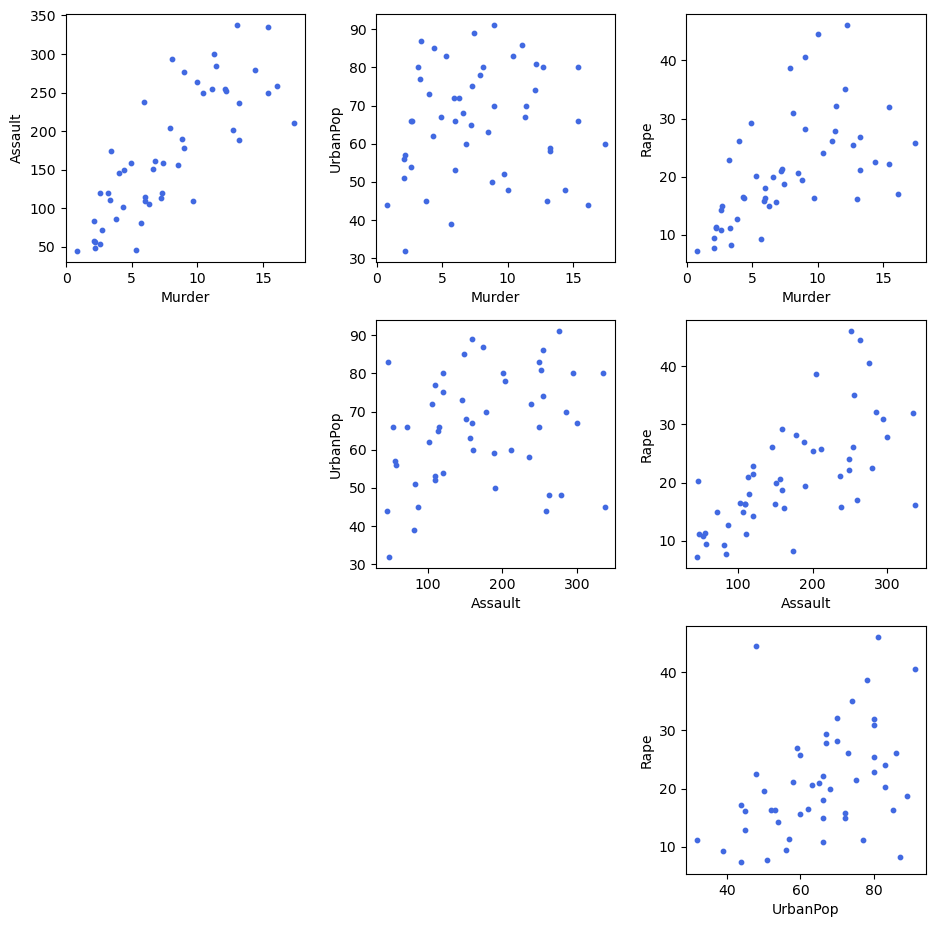

In [7]:
variables = USArrests.columns
fig, axes = plt.subplots(len(variables), len(variables), figsize=(12, 12))

for i, var_x in enumerate(variables):
    for j, var_y in enumerate(variables):
        if i < j:  # solo la diagonal superior
            axes[i, j].scatter(USArrests[var_x], USArrests[var_y], s=10, color='royalblue')
            axes[i, j].set_xlabel(var_x)
            axes[i, j].set_ylabel(var_y)
        else:
            axes[i, j].set_visible(False)  # oculta los demás subplots

plt.tight_layout()
plt.show()

In [8]:
#Dataframes have several useful methods for computing column-wise summaries.

#Mean
    

In [9]:
#Variance

### 2. Dimensionality reduction using PCA

The goal in this section is to reduce the data to two dimensions


1) Standardize the data to be zero-mean and unit-variance 

    StandardScaler

2) Fit the principal components analysis model

    PCA

3) Project the data to the lower-dimensional space


#### 2.1. Standardize the data to be zero-mean and unit-variance
This scaling can be done via the `StandardScaler()` transform imported
above. We first fit the scaler, which computes the necessary means and
standard deviations and then apply it to our data using the transform
method. We combine these steps using the `fit_transform()`
method.

In [10]:
scaler = StandardScaler(with_std=True, with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

#### 2.2. Fit the principal components analysis model
We can then perform principal components analysis
using the `PCA()` transform from the `sklearn.decomposition` packag

In [11]:
pcaUS = PCA()

In [12]:
pcaUS.fit(USArrests_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [13]:
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

The **components_ attribute**
provides the principal component loadings: each row contains the corresponding principal component loading vector.

In [14]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

#### 2.3. Project the data to the lower-dimensional space

The scores can be computed using the `transform()` method of `pca` after
it has been fit.

In [15]:
scores = pcaUS.transform(USArrests_scaled)

### 3. Visualising data with PCA 

Create a 2-dimensional scatter plot 

The `biplot` is a common visualization method used with PCA. It is not
built in as a standard part of sklearn, though there are python packages
that do produce such plots. Here we make a simple biplot manually

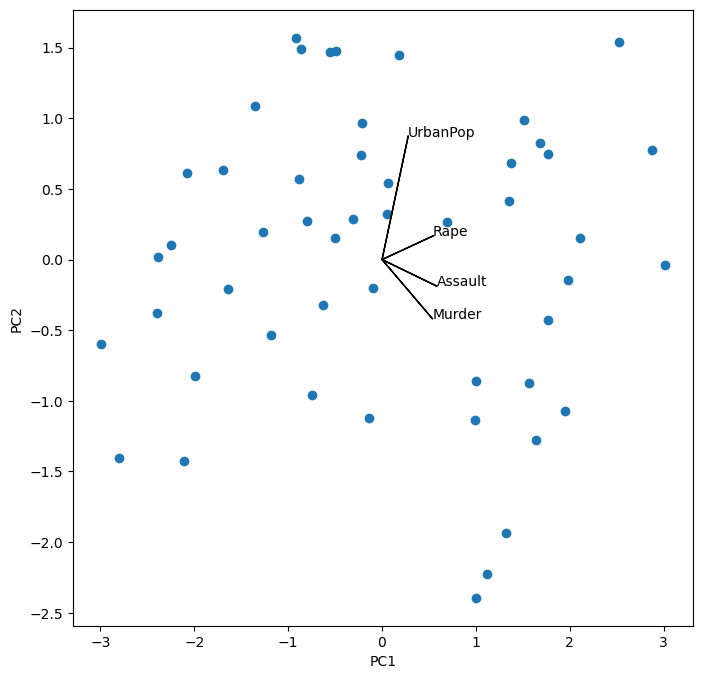

In [16]:
i, j = 0, 1 # which components
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    ax.text(pcaUS.components_[i,k], pcaUS.components_[j,k], USArrests.columns[k])

Recall that the principal components are only unique up to a sign change,
so we can reproduce that figure by flipping the signs of the second set of
scores and loadings. We also increase the length of the arrows to emphasize
the loadings.

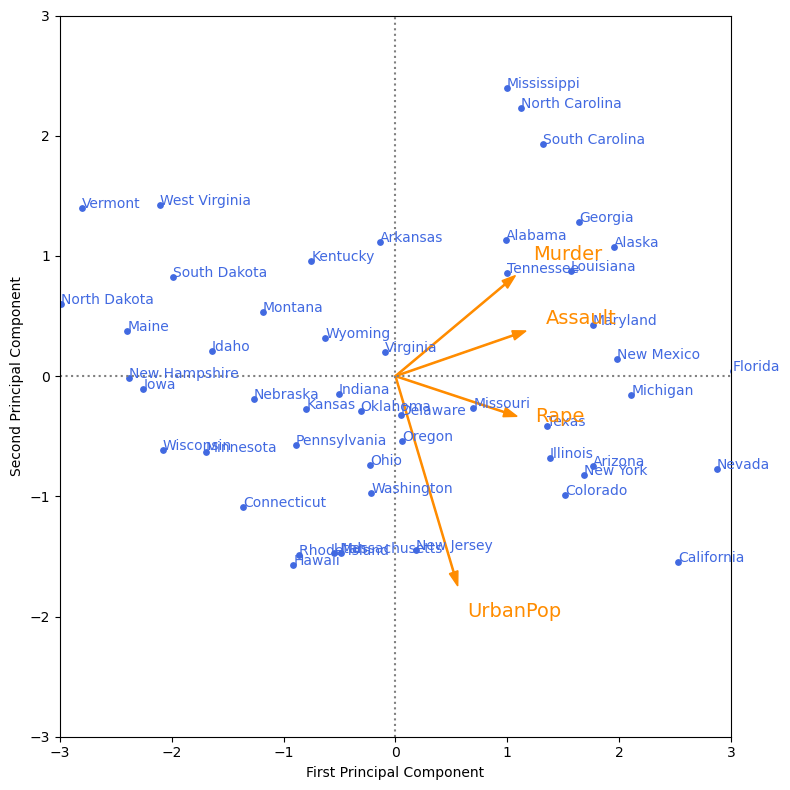

In [17]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Puntos pequeños y azules
ax.scatter(scores[:,0], scores[:,1], s=15, color='royalblue')

# Nombres de los estados
for idx, state in enumerate(USArrests.index):
    ax.text(scores[idx,0], scores[idx,1], state, fontsize=10, color='royalblue')

# Flechas y nombres de variables
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[0,k], s_*pcaUS.components_[1,k],
             color='darkorange', width=0.01, head_width=0.08, length_includes_head=True)
    ax.text(s_*pcaUS.components_[0,k]*1.15, s_*pcaUS.components_[1,k]*1.15,
            USArrests.columns[k], color='darkorange', fontsize=14)

# Líneas de referencia
ax.axhline(0, color='grey', linestyle='dotted')
ax.axvline(0, color='grey', linestyle='dotted')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.tight_layout()
plt.show()


The standard deviations of the principal component scores are as follows:

In [18]:
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

The variance of each score can be extracted directly from the pca object
via the explained_variance_ attribute.

In [19]:
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

The proportion of variance explained by each principal component (PVE)
is stored as explained_variance_ratio_:

In [21]:
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Plot the PVE explained by each component, as well as the cumulative PVE, to show the variation in explained variance with respect to the number of components.

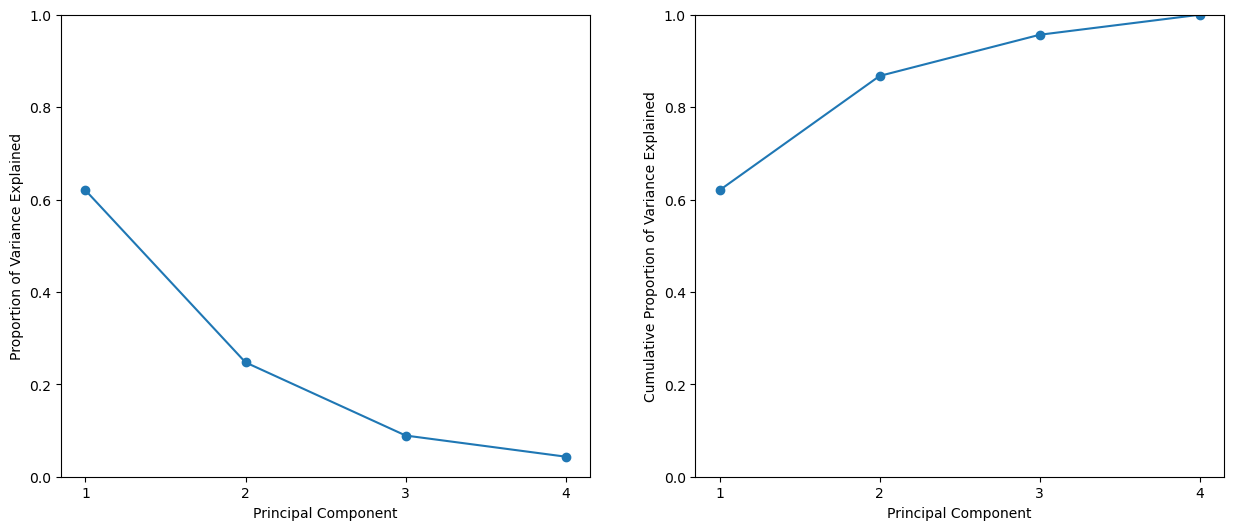

In [22]:
fig , axes = plt.subplots(1, 2, figsize=(15, 6))

ticks = np.arange(pcaUS.n_components_)+1

ax = axes[0]
ax.plot(ticks, pcaUS.explained_variance_ratio_ ,marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(ticks, pcaUS.explained_variance_ratio_.cumsum(),marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)


Scatter plots of each variable against each principal component to to better interpret.

In [ ]:
# Add code

### 4. Effect of the scaling the variables

Repeat the Principal Component Analysis without standardize the variables

In [ ]:
# Add code